In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
holidays = pd.read_csv(r"..\Data\01_raw\holidays_events.csv")
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
holidays.shape

(350, 6)

In [4]:
output = []

for column in holidays.columns:

    null_values  = np.sum(pd.isna(holidays[column]))
    unique = holidays[column].nunique()
    column_data_type = holidays[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = holidays.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,unique,top,freq
date,0,312,object,350,312,2014-06-25,4
type,0,6,object,350,6,Holiday,221
locale,0,3,object,350,3,National,174
locale_name,0,24,object,350,24,Ecuador,174
description,0,103,object,350,103,Carnaval,10
transferred,0,2,bool,350,2,False,338


In [5]:
holidays.drop_duplicates(inplace=True)

In [6]:
holidays.shape

(350, 6)

<Axes: xlabel='type', ylabel='count'>

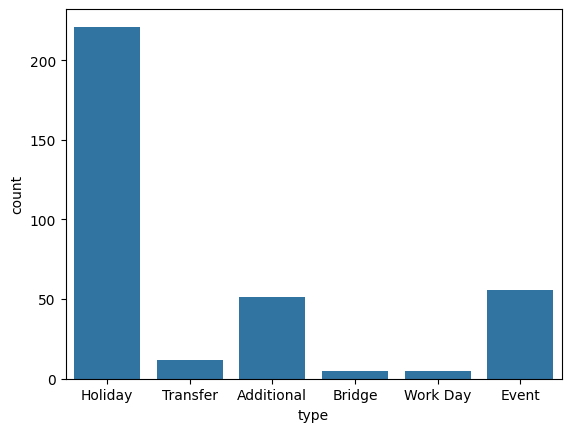

In [7]:
sns.countplot(data = holidays, x='type')

Maximum holidays events are of type holiday.

<Axes: xlabel='locale', ylabel='count'>

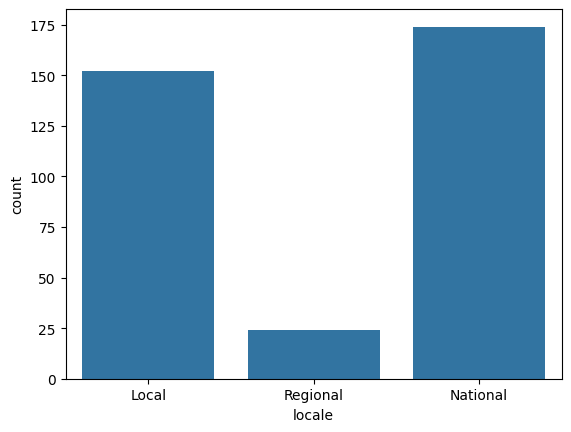

In [8]:
sns.countplot(data = holidays, x='locale')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Manta'),
  Text(1, 0, 'Cotopaxi'),
  Text(2, 0, 'Cuenca'),
  Text(3, 0, 'Libertad'),
  Text(4, 0, 'Riobamba'),
  Text(5, 0, 'Puyo'),
  Text(6, 0, 'Guaranda'),
  Text(7, 0, 'Imbabura'),
  Text(8, 0, 'Latacunga'),
  Text(9, 0, 'Machala'),
  Text(10, 0, 'Santo Domingo'),
  Text(11, 0, 'El Carmen'),
  Text(12, 0, 'Cayambe'),
  Text(13, 0, 'Esmeraldas'),
  Text(14, 0, 'Ecuador'),
  Text(15, 0, 'Ambato'),
  Text(16, 0, 'Ibarra'),
  Text(17, 0, 'Quevedo'),
  Text(18, 0, 'Santo Domingo de los Tsachilas'),
  Text(19, 0, 'Santa Elena'),
  Text(20, 0, 'Quito'),
  Text(21, 0, 'Loja'),
  Text(22, 0, 'Salinas'),
  Text(23, 0, 'Guayaquil')])

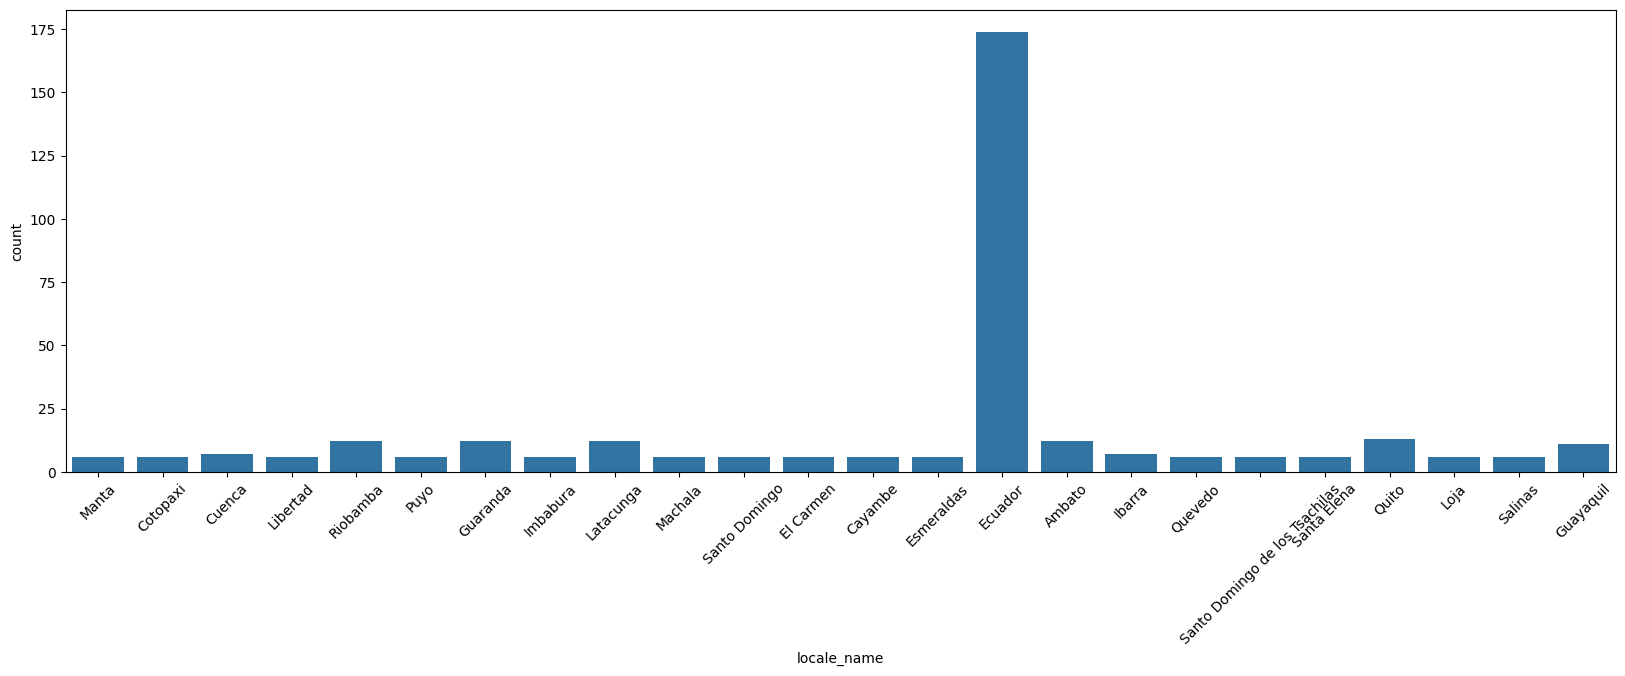

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(data = holidays, x='locale_name')
plt.xticks(rotation=45)

<Axes: xlabel='locale'>

<Figure size 500x400 with 0 Axes>

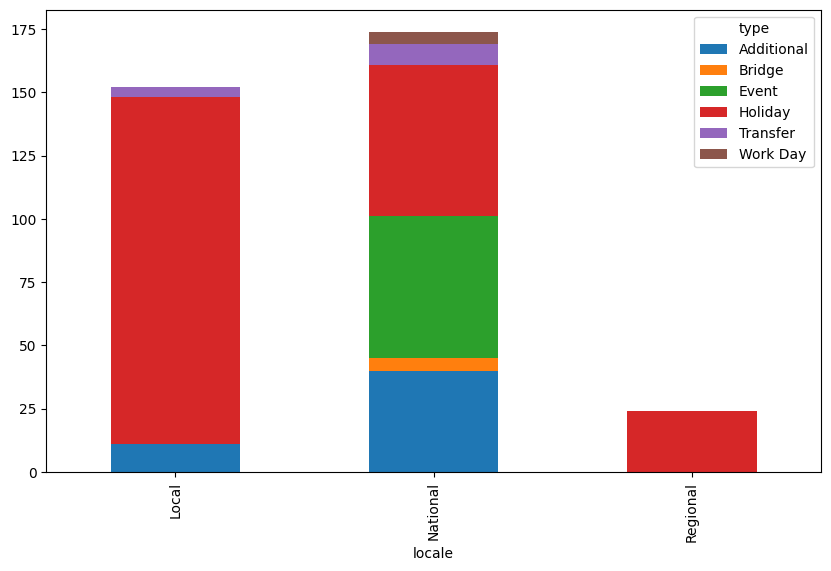

In [26]:
holiday_counts = holidays.groupby(['locale', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(5,4))
holiday_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='locale_name'>

<Figure size 500x400 with 0 Axes>

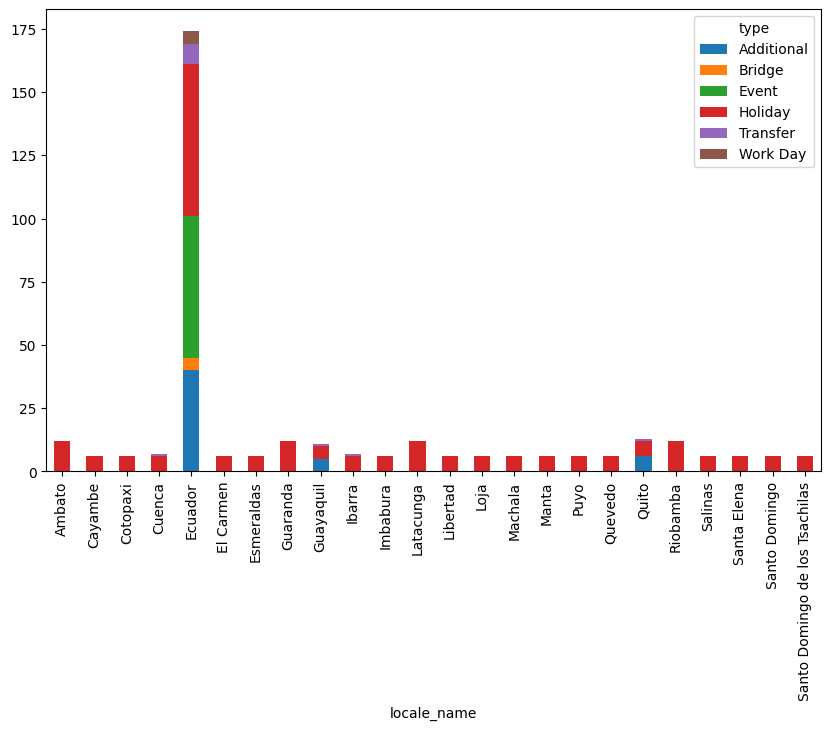

In [27]:
holiday_counts = holidays.groupby(['locale_name', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(5,4))
holiday_counts.plot(kind='bar', stacked=True, figsize=(10, 6))